# Titanic survived Project¶

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score


In [2]:
# Load the dataset
data=pd.read_csv('/Users/rekhagrg/downloads/titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#check for missing value
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:>

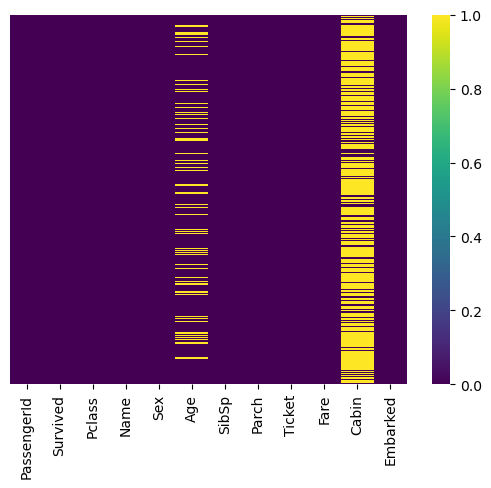

In [4]:
#Exploratory data analysis
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

The yellow spots show the null values for that column

In [29]:
#separate the data into numeric and caterical 
df_num=data [['Age','SibSp','Parch','Fare']]
df_cat=data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

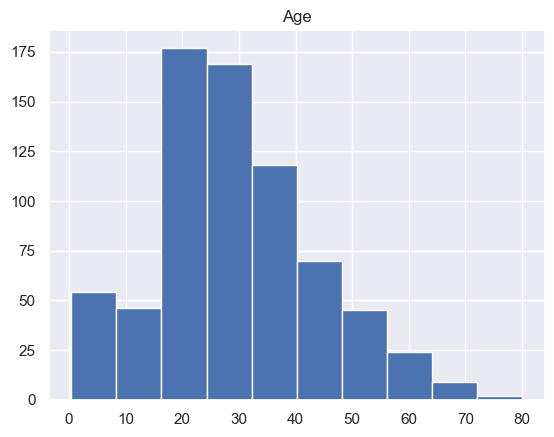

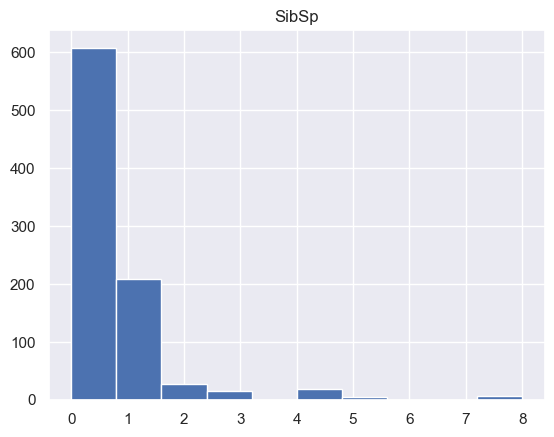

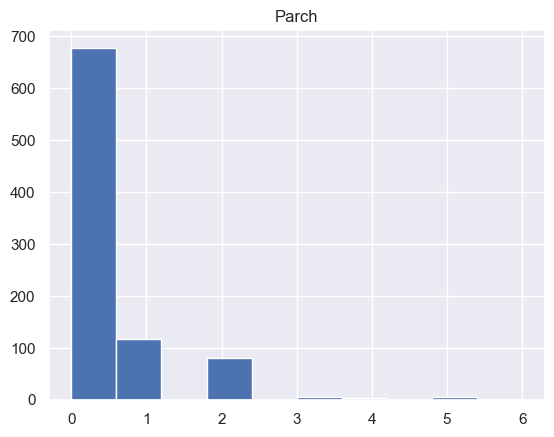

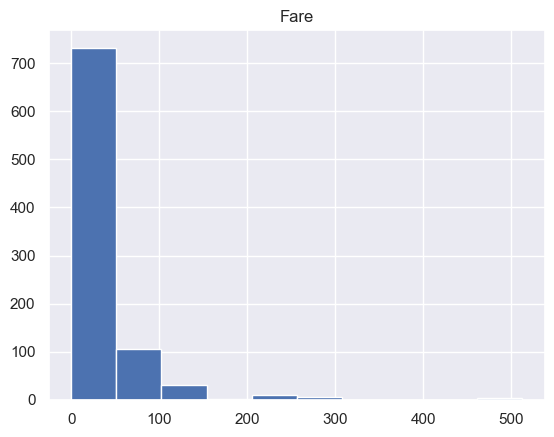

In [30]:
#plots of the numeric data
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

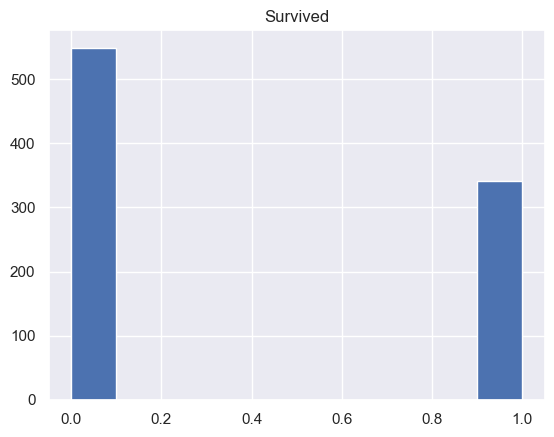

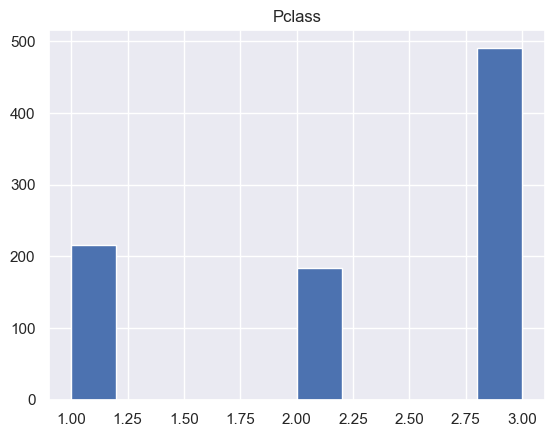

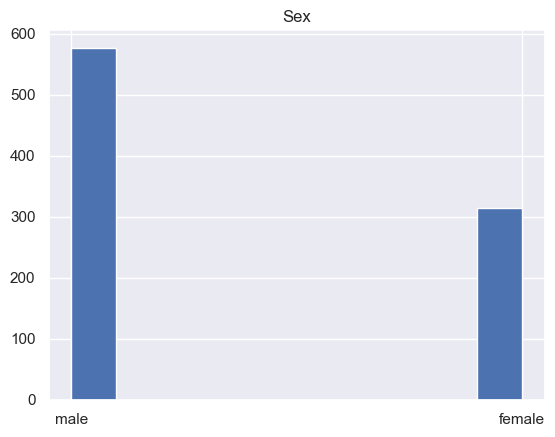

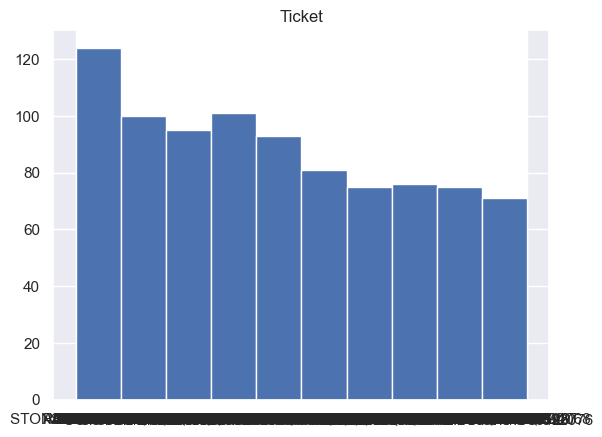

TypeError: '<=' not supported between instances of 'float' and 'str'

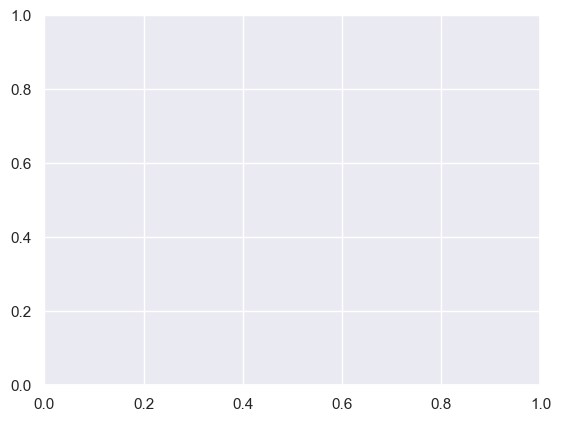

In [31]:
for i in df_cat.columns:
    plt.hist(df_cat[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

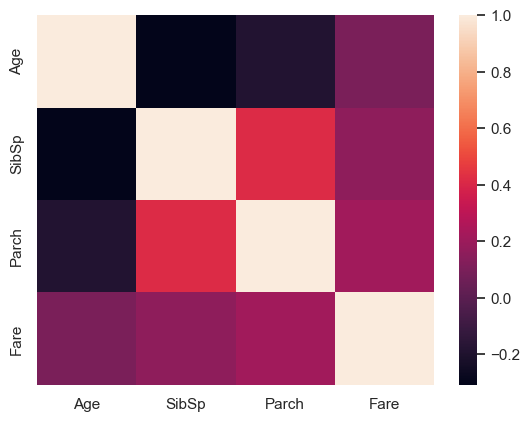

In [32]:
sns.heatmap(df_num.corr())

Here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together.

In [34]:
#let us compare survival rates across the numeric variables
pd.pivot_table(data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


- The average age of survivors is 28, so young people tend to survive more.
-People who paid higher fare rates were more likely to survive, -  more than double. This might be the people traveling in first-class. Thus the rich survived, which is kind of a sad story in this scenario.

-In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates

-And if you are a child, and have siblings, you have less of a chance of surviving

/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


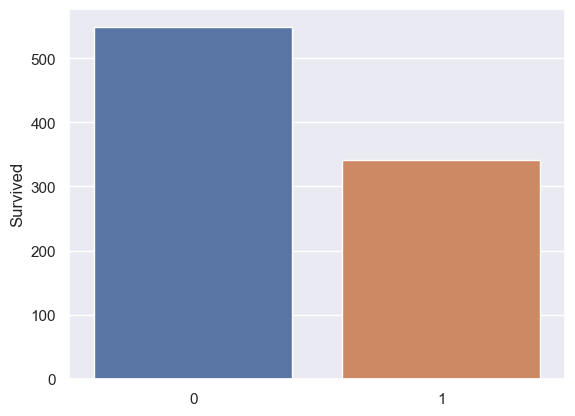

/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


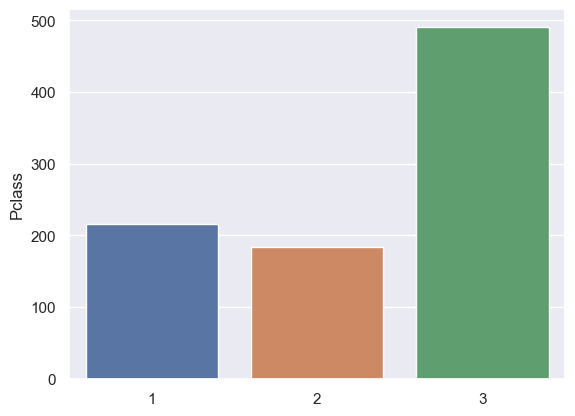

/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


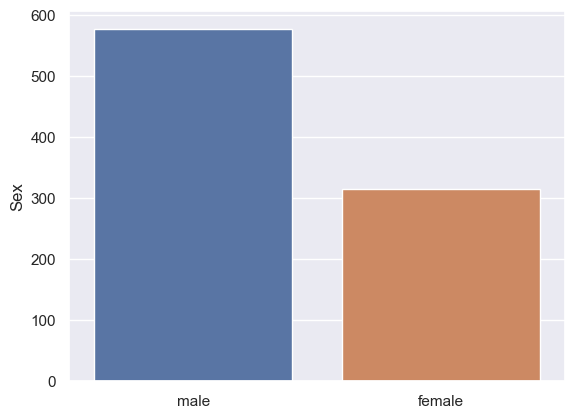

/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


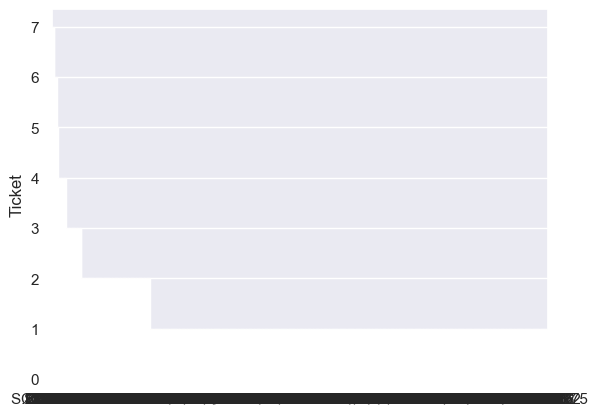

/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


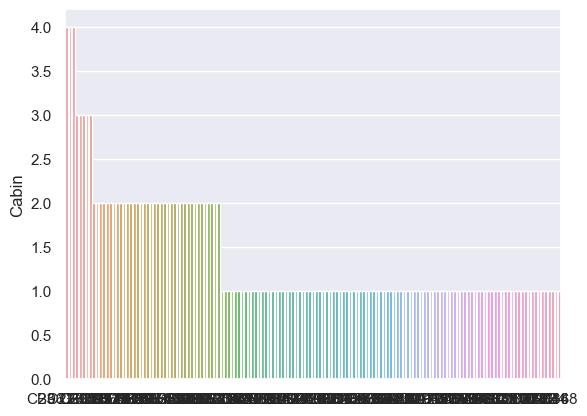

/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


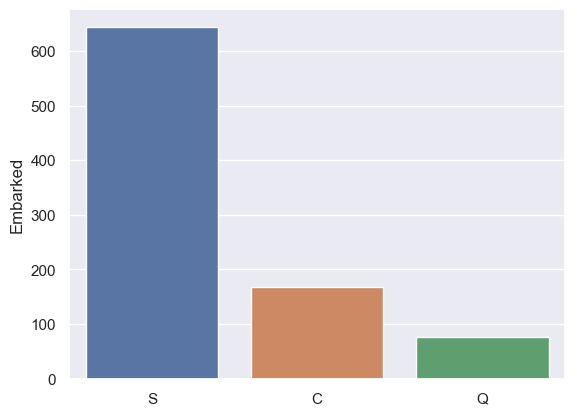

In [35]:
#with categorical variable
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts())
    plt.show()

=The Ticket and Cabin graphs look very messy, we might have to feature engineer them! Other than that, the rest of the graphs tells us:

=Survived: Most of the people died in the shipwreck,  only around 300 people survived.
=Pclass: The majority of the people traveling, had tickets to the 3rd class.
=Sex: There were more males than females aboard the ship, roughly double the amount.
=Embarked: Most of the passengers boarded the ship from Southampton.

In [36]:
#Now we will do something similar to the pivot table above, but with our categorical variables, and compare them against our dependent variable, which is if people survived:
print(pd.pivot_table(data,index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))
print()
print(pd.pivot_table(data,index='Survived',columns='Sex',values='Ticket',aggfunc='count'))
print()
print(pd.pivot_table(data,index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



-Pclass: Here we can see a lot more people survived from the first class than the second pr third class,even though the totla number of passengers in the first class was much less then third class. So its confirmed the rich survived.

-Sex: Most of the women survived and majority of male died
-Embarked:This doesnt mseem much relevent maybe if someone was from "cherbourg" had higher chance of surving.


#we saw ticket and cabin data really dont make sense but if we look the actual cabin data and in that data there is both letter and number so it might be letter indicate where ship it is, which floor,which class and number indicate cabi number. lets split them into individual cabins and see whether somone owned more than a single cabin.

In [38]:
df_cat.Cabin
data['cabin_multiple'] = data.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
data['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

It looks like the vast majority did not have individual cabins and only a few people owned more then one cabins.Now lets see whether the survival rates depend on this:
    

In [39]:
pd.pivot_table(data, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [42]:
#lets look at the letter of cabin they were in
#in this case we will treat null values like its own category 

data['cabin_adv']=data.Cabin.apply(lambda x: str(x)[0])

#camparing survival rates by cabin
print(data.cabin_adv.value_counts())
pd.pivot_table(data,index='Survived',columns='cabin_adv',values='Name',aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [44]:
# lets look at title of individual passengers 
data.Name.head(50)
data['name_title'] = data.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
data['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

From above as we can see ship was boarded by people of many different classes.

# Model Deployment

Lets use various models to see which one is the best result.
-Logistic regression
-K Nearest Neighbour
-Support Vector classifier

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


1) Logistic Regression 

In [59]:
# Preprocess the data
data['Age'].fillna(data['Age'].median(), inplace=True)
data.dropna(subset=['Embarked'], inplace=True)

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

# Define features (X) and target (y)
X = data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']

# Train-Test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_valid)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.7752808988764045


# 2)SVC

In [61]:
# Initialize and fit the Support Vector Classifier
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc.predict(X_valid)

# Calculate accuracy
accuracy_svc = accuracy_score(y_valid, y_pred_svc)
print("SVC Accuracy:", accuracy_svc)


SVC Accuracy: 0.797752808988764


# 3)K Nearest Neighbors(KNN)

In [62]:
# Initialize and fit the K Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_valid)

# Calculate accuracy
accuracy_knn = accuracy_score(y_valid, y_pred_knn)
print("K Nearest Neighbors Accuracy:", accuracy_knn)


K Nearest Neighbors Accuracy: 0.6235955056179775


/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


From the above models output:
- Losistic Regression:77.5%
- SVC: 79.9%
- KNN:62.3%

As we can see accuracy with all our models,Out of all SVC is best.